
<h2 align='center'> MÔN HỌC: KỸ NGHỆ TRI THỨC VÀ HỌC MÁY (7080510) </h2>

---
* Giảng viên: Đặng Văn Nam
* Email: dangvannam@humg.edu.n

---
* Mã sinh viên: 1821050295
* Họ và tên: Đỗ Thị Huyền
* Lớp/Nhóm môn học: DCCTPM63A / Nhóm 01
* Email: huyenjy@gmail.com

---

## CHƯƠNG 4: HỌC KHÔNG GIÁM SÁT - UNSUPERVISED LEARNING
---


## THỰC HÀNH 10
---
Mô tả tập dữ liệu: Data_seles_Excercise.csv. Dữ liệu mua hàng của 200 MiniMart với một nhà phân phối hàng hóa trong năm 2019. Trong đó:
* Cột No: Mã của MiniMart
* Cột City: Ký hiệu khu vực đặt MiniMart
* Cột Distance: Khoảng cách từ MiniMart tới nhà phân phối.
* Cột Grocery: Số tiền MiniMart đã dùng để mua hàng tạp hóa trong năm 2019.
* Cột Milk: Số tiền mà MiniMart đã dùng để mua sữa từ nhà phân phối trong năm 2019

**YÊU CẦU:**
Sử dụng thuật toán phân cụm Kmeans cho tập dữ liệu với 2 thuộc tính phân cụm: Grocery, Milk:
1. Xác định số cụm tối ưu.
2. Thực hiện phân cụm dữ liệu với số cụm tối ưu đã chỉ ra ở yêu cầu 1. Trực quan hóa, Liệt kê danh sách MiniMart theo từng cụm và cho nhận xét.


## 1.Tải và quan sát tập dữ liệu


In [1]:
#{SINH VIÊN THỰC HIỆN TẠI ĐÂY}
# Khai báo thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Đọc tập dữ liệu
path = "data/Data_sales_Excercise.csv"
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No        200 non-null    int64 
 1   City      200 non-null    object
 2   Distance  200 non-null    int64 
 3   Grocery   200 non-null    int64 
 4   Milk      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
#Hiển thị 5 bản ghi đầu tiên:
df.head()

,No,City,Distance,Grocery,Milk
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


In [4]:
#Quan sát các đặc trưng thống kê:
df.describe()

,No,Distance,Grocery,Milk
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,46.155000,53620.500000,5954.375000
std,57.879185,17.492309,34855.146477,1777.210276
min,1.000000,19.000000,0.000000,2600.000000
25%,50.750000,30.000000,26575.000000,4550.000000
50%,100.500000,47.000000,46400.000000,5775.000000
75%,150.250000,63.000000,78225.000000,7431.250000
max,200.000000,75.000000,143500.000000,10075.000000


### 1.1 Quan sát thuộc tính Grocery - Số tiền MiniMart đã dùng để mua hàng tạp hóa trong năm 2019.
---

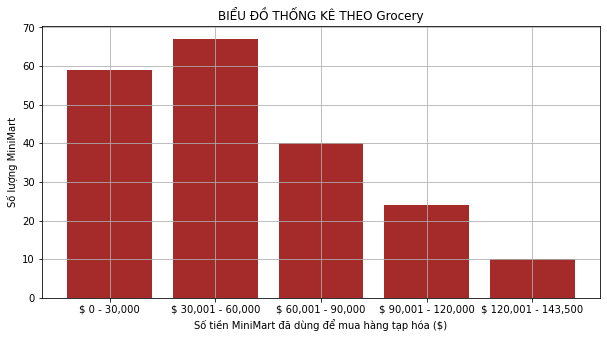

In [5]:
#Trực quan hóa dữ liệu theo từng nhóm thu nhập:
ai0_30 = df["Grocery"][(df["Grocery"] >= 0) & (df["Grocery"] <= 30000)]
ai31_60 = df["Grocery"][(df["Grocery"] > 30000) & (df["Grocery"] <= 60000)]
ai61_90 = df["Grocery"][(df["Grocery"] > 60000) & (df["Grocery"] <= 90000)]
ai91_120 = df["Grocery"][(df["Grocery"] > 90000) & (df["Grocery"] <= 120000)]
ai121_150 = df["Grocery"][(df["Grocery"] > 120000)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 143,500"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(10,5))
plt.bar(aix, aiy, color='brown')
plt.title("BIỂU ĐỒ THỐNG KÊ THEO Grocery")
plt.xlabel("Số tiền MiniMart đã dùng để mua hàng tạp hóa ($)")
plt.ylabel("Số lượng MiniMart")
plt.grid(True)
plt.show()

### 1.2 Quan sát thuộc tính Milk - Số tiền mà MiniMart đã dùng để mua sữa từ nhà phân phối trong năm 2019.
---

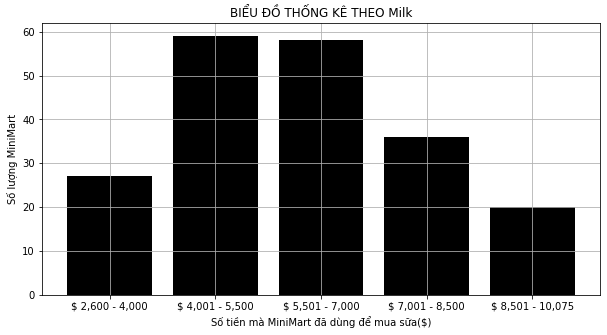

In [6]:
#Trực quan hóa dữ liệu theo từng nhóm thu nhập:
ai26_40 = df["Milk"][(df["Milk"] >= 2600) & (df["Milk"] <= 4000)]
ai41_55 = df["Milk"][(df["Milk"] > 4000) & (df["Milk"] <= 5500)]
ai56_70 = df["Milk"][(df["Milk"] > 5500) & (df["Milk"] <= 7000)]
ai70_85 = df["Milk"][(df["Milk"] > 7000) & (df["Milk"] <= 8500)]
ai85_10 = df["Milk"][(df["Milk"] > 8500)]

aix = ["$ 2,600 - 4,000", "$ 4,001 - 5,500", "$ 5,501 - 7,000", "$ 7,001 - 8,500", "$ 8,501 - 10,075"]
aiy = [len(ai26_40.values), len(ai41_55.values), len(ai56_70.values), len(ai70_85.values), len(ai85_10.values)]

plt.figure(figsize=(10,5))
plt.bar(aix, aiy, color='black')
plt.title("BIỂU ĐỒ THỐNG KÊ THEO Milk")
plt.xlabel("Số tiền mà MiniMart đã dùng để mua sữa($)")
plt.ylabel("Số lượng MiniMart")
plt.grid(True)
plt.show()

# 2.Tiến hành phân cụm tập dữ liệu

## 2.1 Sử dụng phương pháp khửu tay tìm số cụm tối ưu

In [7]:
#Sử dụng 2 thuộc tính Grocery, Milk để phân cụm dữ liệu 
data_cluster = df.iloc[:,-2:]
data_cluster.head()

,Grocery,Milk
0,69900,6325
1,79000,5200
2,85500,7825
3,17100,8375
4,5500,5450


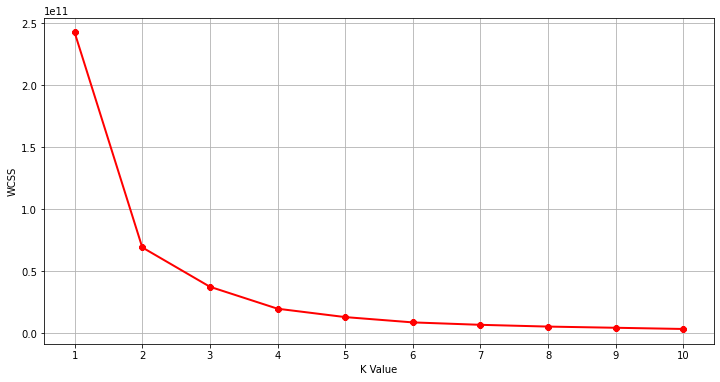

In [8]:
from sklearn.cluster import KMeans
wcss = []
#Thử số cụm (n_clusters) thay đổi từ 1 đến 10
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(df.iloc[:,-2:])
    wcss.append(kmeans.inertia_)

#Trực quan hóa lên biểu đồ:
plt.figure(figsize=(12,6))    
plt.grid(True)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

Từ biểu đồ trên theo phương pháp khửu tay ta thấy số lượng cụm n = 3 tốt nhất

## 2.2 Tiến hành phân cụm dữ liệu theo số lượng cụm phía trên
---
Với k=3. Phân chia tập dữ liệu thành 3 cụm

In [9]:
from sklearn.cluster import KMeans

#Thực hiện phân thành 3 cụm, các tham số khác sử dụng mặc định
model_km = KMeans(n_clusters=3)

#Liệt kê các tham số của mô hình
model_km.get_params()

model_km.fit_predict(df.iloc[:,-2:])

#Tạo cột Cluster để cho biết mẫu thuộc cụm nào
df["Cluster"] = model_km.labels_
df

,No,City,Distance,Grocery,Milk,Cluster
0,1,K,60,69900,6325,2
1,2,K,30,79000,5200,2
2,3,E,52,85500,7825,2
3,4,E,57,17100,8375,0
4,5,E,55,5500,5450,0
...,...,...,...,...,...,...
195,196,E,22,96600,7900,1
196,197,E,39,83700,7675,2
197,198,K,25,34000,4000,0
198,199,K,30,42000,5500,0


0    92
2    72
1    36
Name: Cluster, dtype: int64


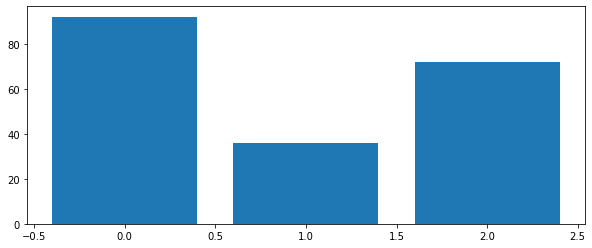

In [10]:
#Thống kê số lượng MiniMart theo mỗi cụm:
sum_cluster = df.Cluster.value_counts()
print(sum_cluster)

#Trực quan hóa dữ liệu
plt.figure(figsize=(10,4))
plt.bar(sum_cluster.index, sum_cluster.values)
plt.show()

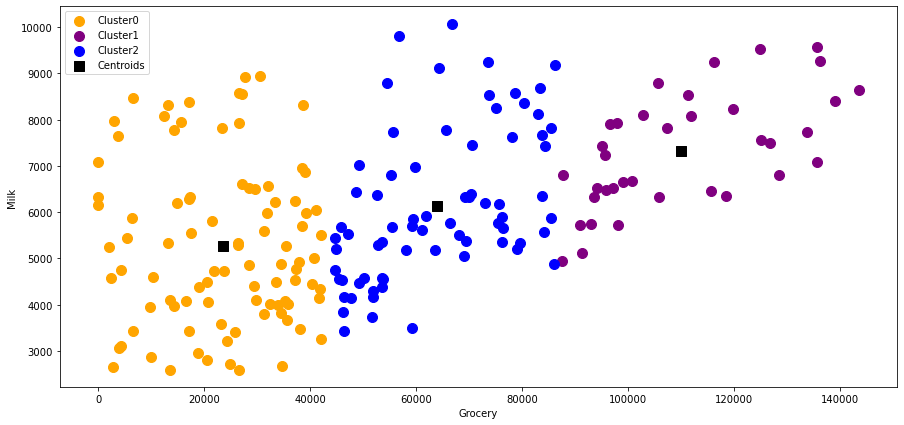

In [11]:
#Trực quan hóa phân cụm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
ax.scatter(df["Grocery"][df.Cluster == 0], df["Milk"][df.Cluster == 0], c='orange', s=100,label='Cluster0')
ax.scatter(df["Grocery"][df.Cluster == 1], df["Milk"][df.Cluster == 1], c='purple', s=100,label='Cluster1')
ax.scatter(df["Grocery"][df.Cluster == 2], df["Milk"][df.Cluster == 2], c='blue', s=100,label='Cluster2')
ax.scatter(model_km.cluster_centers_[:, 0], 
           model_km.cluster_centers_[:, 1],
           color = 'black', label = 'Centroids',s=100,marker='s')
#ax.view_init(30, 185)
plt.xlabel("Grocery")
plt.ylabel("Milk")
plt.legend()
plt.show()

In [12]:
#Vị trí tâm của các cụm
np.round(model_km.cluster_centers_,1)

array([[ 23539.1,   5272. ],
       [109905.6,   7325.7],
       [ 63915.3,   6140.6]])

In [13]:
#Tổng bình phương khoảng cách từ các mẫu tới trung tâm cụm gần nhất.
model_km.inertia_

37348094671.27114

# 3.Kết quả thu được
---
## Nhóm 0:

In [14]:
#Danh sách MiniMart nhóm 0
cluster_0 = df[df.Cluster == 0]
cluster_0.reset_index(inplace=True)
cluster_0[['No','City','Distance','Grocery','Milk','Cluster']]

,No,City,Distance,Grocery,Milk,Cluster
0,4,E,57,17100,8375,0
1,5,E,55,5500,5450,0
2,6,E,68,27200,8550,0
3,7,E,41,20500,4500,0
4,9,K,33,13200,8325,0
...,...,...,...,...,...,...
87,192,E,25,10000,2875,0
88,193,K,74,39200,5975,0
89,195,E,44,13200,5325,0
90,198,K,25,34000,4000,0


In [15]:
#Đặc trưng thống kê của thuộc tính phân cụm MiniMart nhóm 0
cluster_0[['Distance','Grocery','Milk']].describe()

,Distance,Grocery,Milk
count,92.000000,92.000000,92.000000
mean,41.445652,23539.130435,5272.010870
std,17.276271,12440.778009,1741.891901
min,19.000000,0.000000,2600.000000
25%,25.000000,14200.000000,4018.750000
50%,36.500000,26150.000000,4900.000000
75%,57.000000,34500.000000,6325.000000
max,75.000000,42000.000000,8950.000000


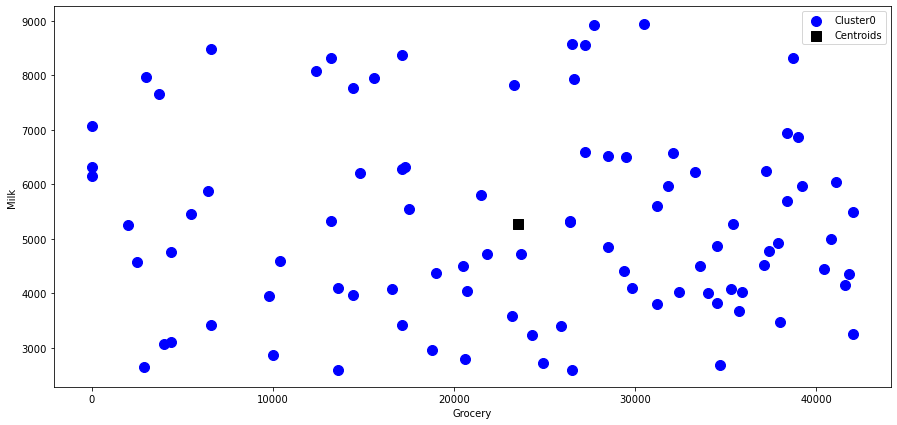

In [16]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111,)
ax.scatter(cluster_0['Grocery'], cluster_0["Milk"], c='blue', s=100,label='Cluster0')
ax.scatter(model_km.cluster_centers_[0, 0], model_km.cluster_centers_[0, 1], color = 'black', label = 'Centroids',s=100,marker=',')
#ax.view_init(30, 185)
plt.xlabel("Grocery")
plt.ylabel("Milk")
plt.legend()
plt.show()

**Đặc trưng của MiniMart Nhóm 0 là: Số tiền mua hàng tạp hóa thấp (23539), Số tiền mua sữa cao (5272 bằng 22.4% số tiền mua hàng tạp hóa)**

## Nhóm 1
---

In [17]:
#Danh sách MiniMart nhóm 1
cluster_1 = df[df.Cluster == 1]
cluster_1.reset_index(inplace=True)
cluster_1[['No','City','Distance','Grocery','Milk','Cluster']]

,No,City,Distance,Grocery,Milk,Cluster
0,12,E,21,95800,6475,1
1,16,K,35,143500,8650,1
2,17,E,72,91300,5125,1
3,23,E,41,90900,5725,1
4,25,E,56,126800,7500,1
5,34,K,60,95600,7225,1
6,40,E,66,111300,8525,1
7,41,E,51,102700,8100,1
8,50,E,63,118500,6350,1
9,53,E,60,105600,8800,1


In [18]:
#Đặc trưng thống kê của thuộc tính phân cụm MiniMart nhóm 1
cluster_1[['Distance','Grocery','Milk']].describe()

,Distance,Grocery,Milk
count,36.000000,36.000000,36.000000
mean,57.972222,109905.555556,7325.694444
std,15.745269,16846.448451,1223.628768
min,20.000000,87500.000000,4950.000000
25%,52.500000,95750.000000,6468.750000
50%,64.000000,105650.000000,7325.000000
75%,69.250000,124850.000000,8131.250000
max,75.000000,143500.000000,9575.000000


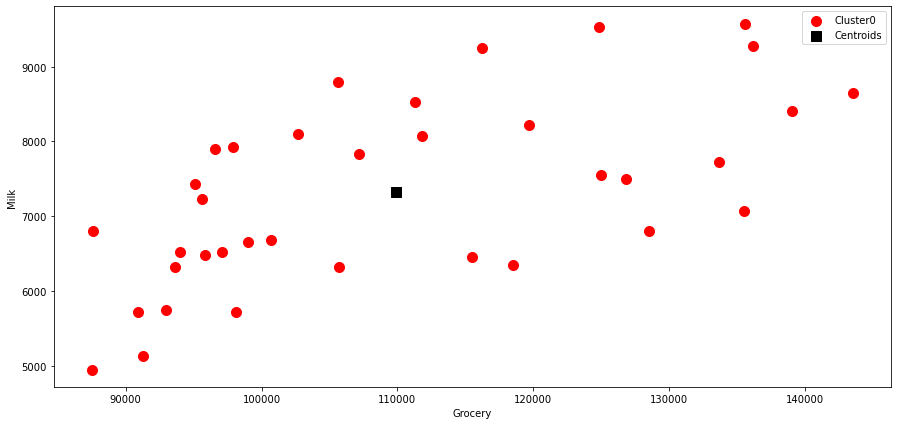

In [19]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111,)
ax.scatter(cluster_1['Grocery'], cluster_1["Milk"], c='red', s=100,label='Cluster0')
ax.scatter(model_km.cluster_centers_[1, 0], model_km.cluster_centers_[1, 1], color = 'black', label = 'Centroids',s=100,marker=',')
#ax.view_init(30, 185)
plt.xlabel("Grocery")
plt.ylabel("Milk")
plt.legend()
plt.show()

**Đặc trưng của MiniMart Nhóm 1 là: Số tiền mua hàng tạp hóa rất cao, Số tiền mua sữa cao (7325 bằng 6.66% số tiền mua hàng tạp hóa)**

## Nhóm 2
---

In [20]:
#Danh sách MiniMart nhóm 2
cluster_2 = df[df.Cluster == 2]
cluster_2.reset_index(inplace=True)
cluster_2[['No','City','Distance','Grocery','Milk','Cluster']]

,No,City,Distance,Grocery,Milk,Cluster
0,1,K,60,69900,6325,2
1,2,K,30,79000,5200,2
2,3,E,52,85500,7825,2
3,8,E,20,69000,5050,2
4,11,K,33,59200,5700,2
...,...,...,...,...,...,...
67,183,K,38,59700,6975,2
68,191,E,57,44700,5450,2
69,194,E,44,75600,6175,2
70,197,E,39,83700,7675,2


In [21]:
#Đặc trưng thống kê của thuộc tính phân cụm MiniMart nhóm 2
cluster_2[['Distance','Grocery','Milk']].describe()

,Distance,Grocery,Milk
count,72.000000,72.000000,72.00000
mean,46.263889,63915.277778,6140.62500
std,15.915262,13434.847056,1622.84764
min,19.000000,44700.000000,3425.00000
25%,32.000000,52350.000000,5143.75000
50%,47.000000,62700.000000,5737.50000
75%,60.000000,75725.000000,7431.25000
max,75.000000,86100.000000,10075.00000


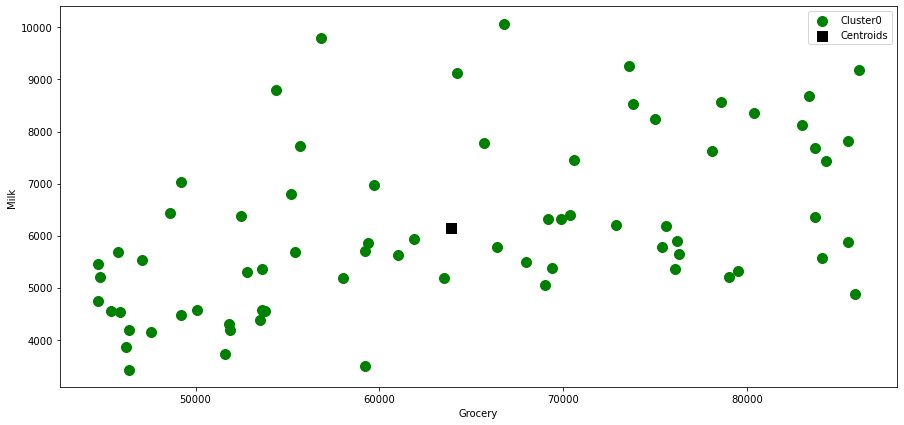

In [22]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111,)
ax.scatter(cluster_2['Grocery'], cluster_2["Milk"], c='green', s=100,label='Cluster0')
ax.scatter(model_km.cluster_centers_[2, 0], model_km.cluster_centers_[2, 1], color = 'black', label = 'Centroids',s=100,marker=',')
#ax.view_init(30, 185)
plt.xlabel("Grocery")
plt.ylabel("Milk")
plt.legend()
plt.show()

**Đặc trưng của MiniMart Nhóm 2 là:Số tiền mua hàng tạp hóa khá cao (63915), Số tiền mua sữa cao (6140 bằng 9.6% số tiền mua hàng tạp hóa)**